# K-Means Clustering for Sections

In [780]:
import re
import glob
import string

import pandas as pd

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

from sklearn.externals import joblib

from sklearn.cluster import KMeans

In [781]:
list_of_dfs = []

for f in glob.glob('sections/*.csv'):
    list_of_dfs.append(pd.read_csv(f, encoding='utf-8-sig'))

In [782]:
list_of_dfs[0]

,country,iso,gdp,population,year,tariff_f,duty_f,quota_f,voluntary_restraint_f,subsidy_f,...,copyright_lf,countervailing_lf,unfair_lf,fair_trade_lf,trade_facilitation_lf,section_number,section_name,words,paragraphs,text
0,guyana,GUY,3.446266e+09,773303.0,2015,0,0,0,0,0,...,0,0,0,0,0,3.1.1,export documentation and procedures,132,4,"['3.2.1 Export documentation and procedures',..."
1,hong_kong_china,HKG,3.210000e+11,7346700.0,2014,0,0,0,0,0,...,0,0,0,0,0,3.1.1,export documentation and procedures,203,2,"['3.3.1 Export documents and procedures', '3...."


In [783]:
#doc list with section tag
section_text = []
section_names = []

translator = str.maketrans('', '', string.punctuation)

for df in list_of_dfs:
    text = ' '.join(list(df['text'].values))
    
    s = re.sub(r'\d+', '', text)
    ns = s.translate(translator)
    
    section_text.append(' '.join(ns.split()).lower())
    section_names.append(df['section_name'].values[0])

In [784]:
print((section_names[0], section_text[0]))

('export documentation and procedures', 'export documentation and procedures procedures applied to exports are similar to those applied to imports exporters must register with the gra predeparture declarations for exports must be submitted to the gra with the operation of the risk management unit in not all exports are subject to physical inspection except exports to the united states and the united kingdom the presence of a customs officer at exporters premises when containers are loaded is no longer necessary export containers are subject to scanning based on risk profiling when necessary physical inspections are conducted on consignments that are deemed to have high risks implementations of risk profiling have reportedly reduced inspections of shipments there are some additional measures applied to exports of forestry products section there are also facilitation measures provided for exports of perishable goods export documents and procedures an export declaration must be lodged ele

In [785]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(section_text)

In [786]:
tfidf_matrix.shape

(254, 23700)

In [787]:
dist = 1 - cosine_similarity(tfidf_matrix)
dist

array([[ -2.22044605e-16,   9.45618292e-01,   8.81779606e-01, ...,
          9.38979530e-01,   9.53498639e-01,   9.15057439e-01],
       [  9.45618292e-01,   2.22044605e-16,   9.06851294e-01, ...,
          9.38626242e-01,   9.71467680e-01,   8.84017709e-01],
       [  8.81779606e-01,   9.06851294e-01,  -2.22044605e-16, ...,
          8.43827392e-01,   9.69508097e-01,   9.39875055e-01],
       ..., 
       [  9.38979530e-01,   9.38626242e-01,   8.43827392e-01, ...,
         -2.22044605e-16,   9.71559223e-01,   9.38789693e-01],
       [  9.53498639e-01,   9.71467680e-01,   9.69508097e-01, ...,
          9.71559223e-01,   0.00000000e+00,   9.65870918e-01],
       [  9.15057439e-01,   8.84017709e-01,   9.39875055e-01, ...,
          9.38789693e-01,   9.65870918e-01,  -2.22044605e-16]])

>Change "num_clusters" below to designated number.

In [788]:
num_clusters = 25

km = KMeans(n_clusters=num_clusters, random_state=2)

%time km.fit(tfidf_matrix.toarray())

CPU times: user 8.67 s, sys: 713 ms, total: 9.39 s
Wall time: 9.86 s


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=25, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=2, tol=0.0001, verbose=0)

In [789]:
clusters = km.labels_.tolist()

In [790]:
sections_dict = {'section_names' : section_names, 'clusters' : clusters}
df = pd.DataFrame(sections_dict, index=[i for i in range(len(clusters))], columns=['section_names', 'clusters'])

In [791]:
df

,section_names,clusters
0,export documentation and procedures,5
1,other charges,14
2,export incentives,17
3,registration customs documents and procedures,2
4,customs procedures and valuation,2
5,export prohibitions authorizations and licensing,5
6,export subsidies promotion and assistance,16
7,prohibitions licensing and controls,17
8,tariffs and other charges affecting imports,14
9,export duty drawback,5


In [792]:
cluster_samples

{0: ['export credit insurance and guarantees'],
 1: ['export subsidies promotion and assistance',
  'export subsidies and inward processing',
  'export subsidies and promotion'],
 2: ['taxes charges and levies',
  'export duties charges and levies',
  'export taxes charges and levies'],
 3: ['registration customs documents and procedures',
  'customs procedures and valuation',
  'customs procedures valuation and requirements'],
 4: ['subsidies and other assistance programmes',
  'industrial policy including subsidies',
  'export subsidies and support'],
 5: ['tax',
  'legal framework for businesses registration and licensing',
  'industrial free zones regime'],
 6: ['competition policy state aid consumer protection and price controls',
  'competition policy',
  'competition policy consumer protection and price controls'],
 7: ['privatization'],
 8: ['state trading state-owned enterprises and privatization',
  'state trading enterprises',
  'government trading enterprises'],
 9: ['incor

In [793]:
#Note: line directly below is used in visualization only
cluster_samples = {}

order_centroids = km.cluster_centers_.argsort()[:, ::-1] 

c_counter = 0
names = list(df['section_names'].values)
clus = list(df['clusters'].values)

with open('25_cluster.txt', 'w') as f:
    for i in range(num_clusters):
        print("Cluster %d:" % i, end='')
        f.write("Cluster %d:" % i)
    
        s_list = []
    
        for c in range(len(clus)):
            if clus[c] == i:
                print(' %s,' % names[c], end='')
                f.write(' %s,' % names[c])
                s_list.append(names[c])
        
        cluster_samples[c_counter] = s_list[:3]
        c_counter+=1
            
        print('\n')
        f.write('\n\n')
        
f.close()

Cluster 0: customs valuation, preshipment inspection, preshipment inspection and customs valuation, customs clearance, customs valuation and pre-shipment inspection, customs valuation and classification, preshipment or at-destination inspection, pre- and post-shipment inspection,

Cluster 1: contingency measures, competition policy state aid consumer protection and price controls, anti-dumping countervailing and safeguard measures, competition policy, government trading enterprises, government-linked companies, trade-related intellectual property regime, intellectual property rights, protection of intellectual property, competition policy consumer protection and price controls, competition and price control, competition and consumer policy, price controls, competition policy and regulatory issues, industrial property rights, consumer policy and protection, competition policy state aid and price controls, state trading,

Cluster 2: registration customs documents and procedures, customs 

# Visualization

>**NOTE:** We only have 25 colors -- add more if # clusters > 25.

In [794]:
import random

import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.decomposition import PCA

pca = PCA(n_components=4, random_state=1)
points = pca.fit_transform(dist)

xs, ys = points[:, 0], points[:, 1]

In [795]:
possible_colors = ['#FA5858', '#B40404', '#610B0B', '#FAAC58', '#DF7401', '#FFFF00',
                   '#AEB404', '#BFFF00', '#86B404', '#80FF00', '#58FAF4', '#086A87',
                   '#2E64FE', '#0404B4', '#8258FA', '#4B088A', '#FF00FF', '#B4045F',
                   '#FA58D0', '#A4A4A4', '#000000', '#886A08', '#A9F5BC', '#F5A9A9',
                   '#E0E6F8']
 
#names are the dict from above: cluster_samples
cluster_colors = {}

prev_picks = []
counter = 0
while len(cluster_colors) < num_clusters:
    pick_random = random.randint(a=0, b=len(possible_colors)-1)
    if pick_random not in prev_picks:
        cluster_colors[counter] = possible_colors[pick_random]
        prev_picks.append(pick_random)
        counter += 1

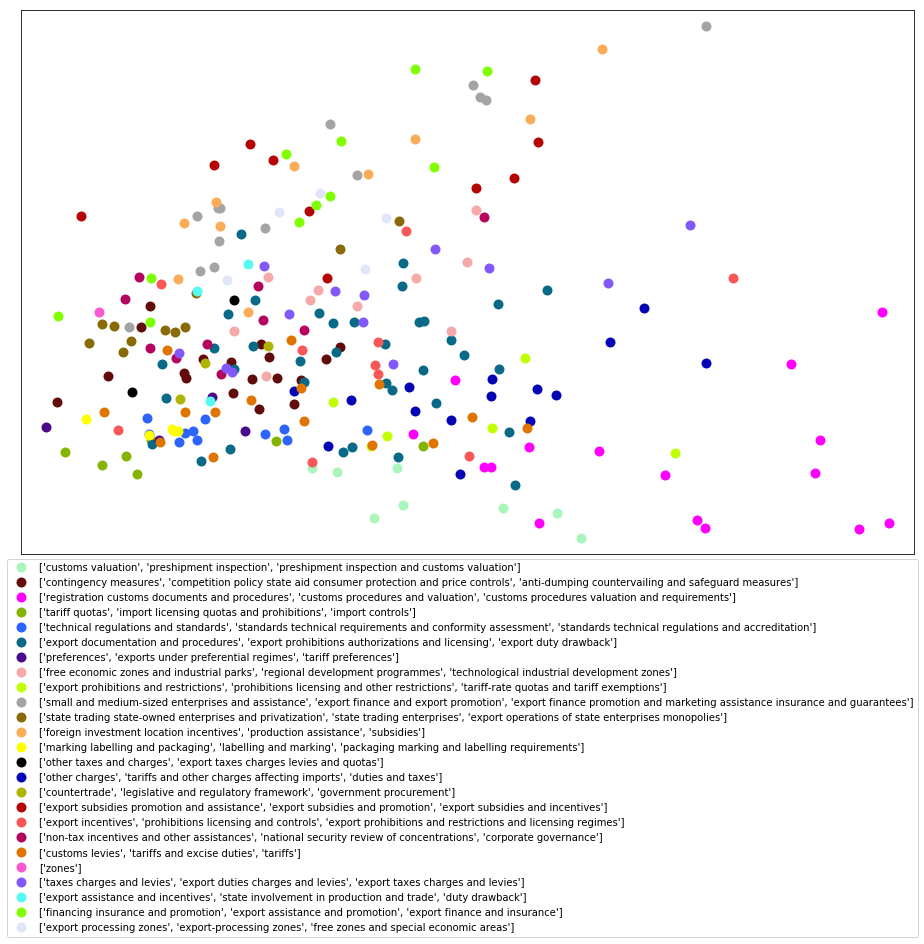

In [796]:
%matplotlib inline 
df_vals = pd.DataFrame(dict(x=xs, y=ys, label=clusters, title=section_names)) 
groups = df_vals.groupby('label')

fig, ax = plt.subplots(figsize=(16, 10))
ax.margins(0.03)

for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=10, 
            label=cluster_samples[name], color=cluster_colors[name], mec='none')
    
    ax.set_aspect('auto')
    ax.tick_params(bottom='off', top='off', labelbottom='off')
    ax.tick_params(left='off', top='off', labelleft='off')
    
plt.legend(bbox_to_anchor=(1.01, 0))

plt.savefig('25_cluster.png', bbox_inches='tight')
    
plt.show()

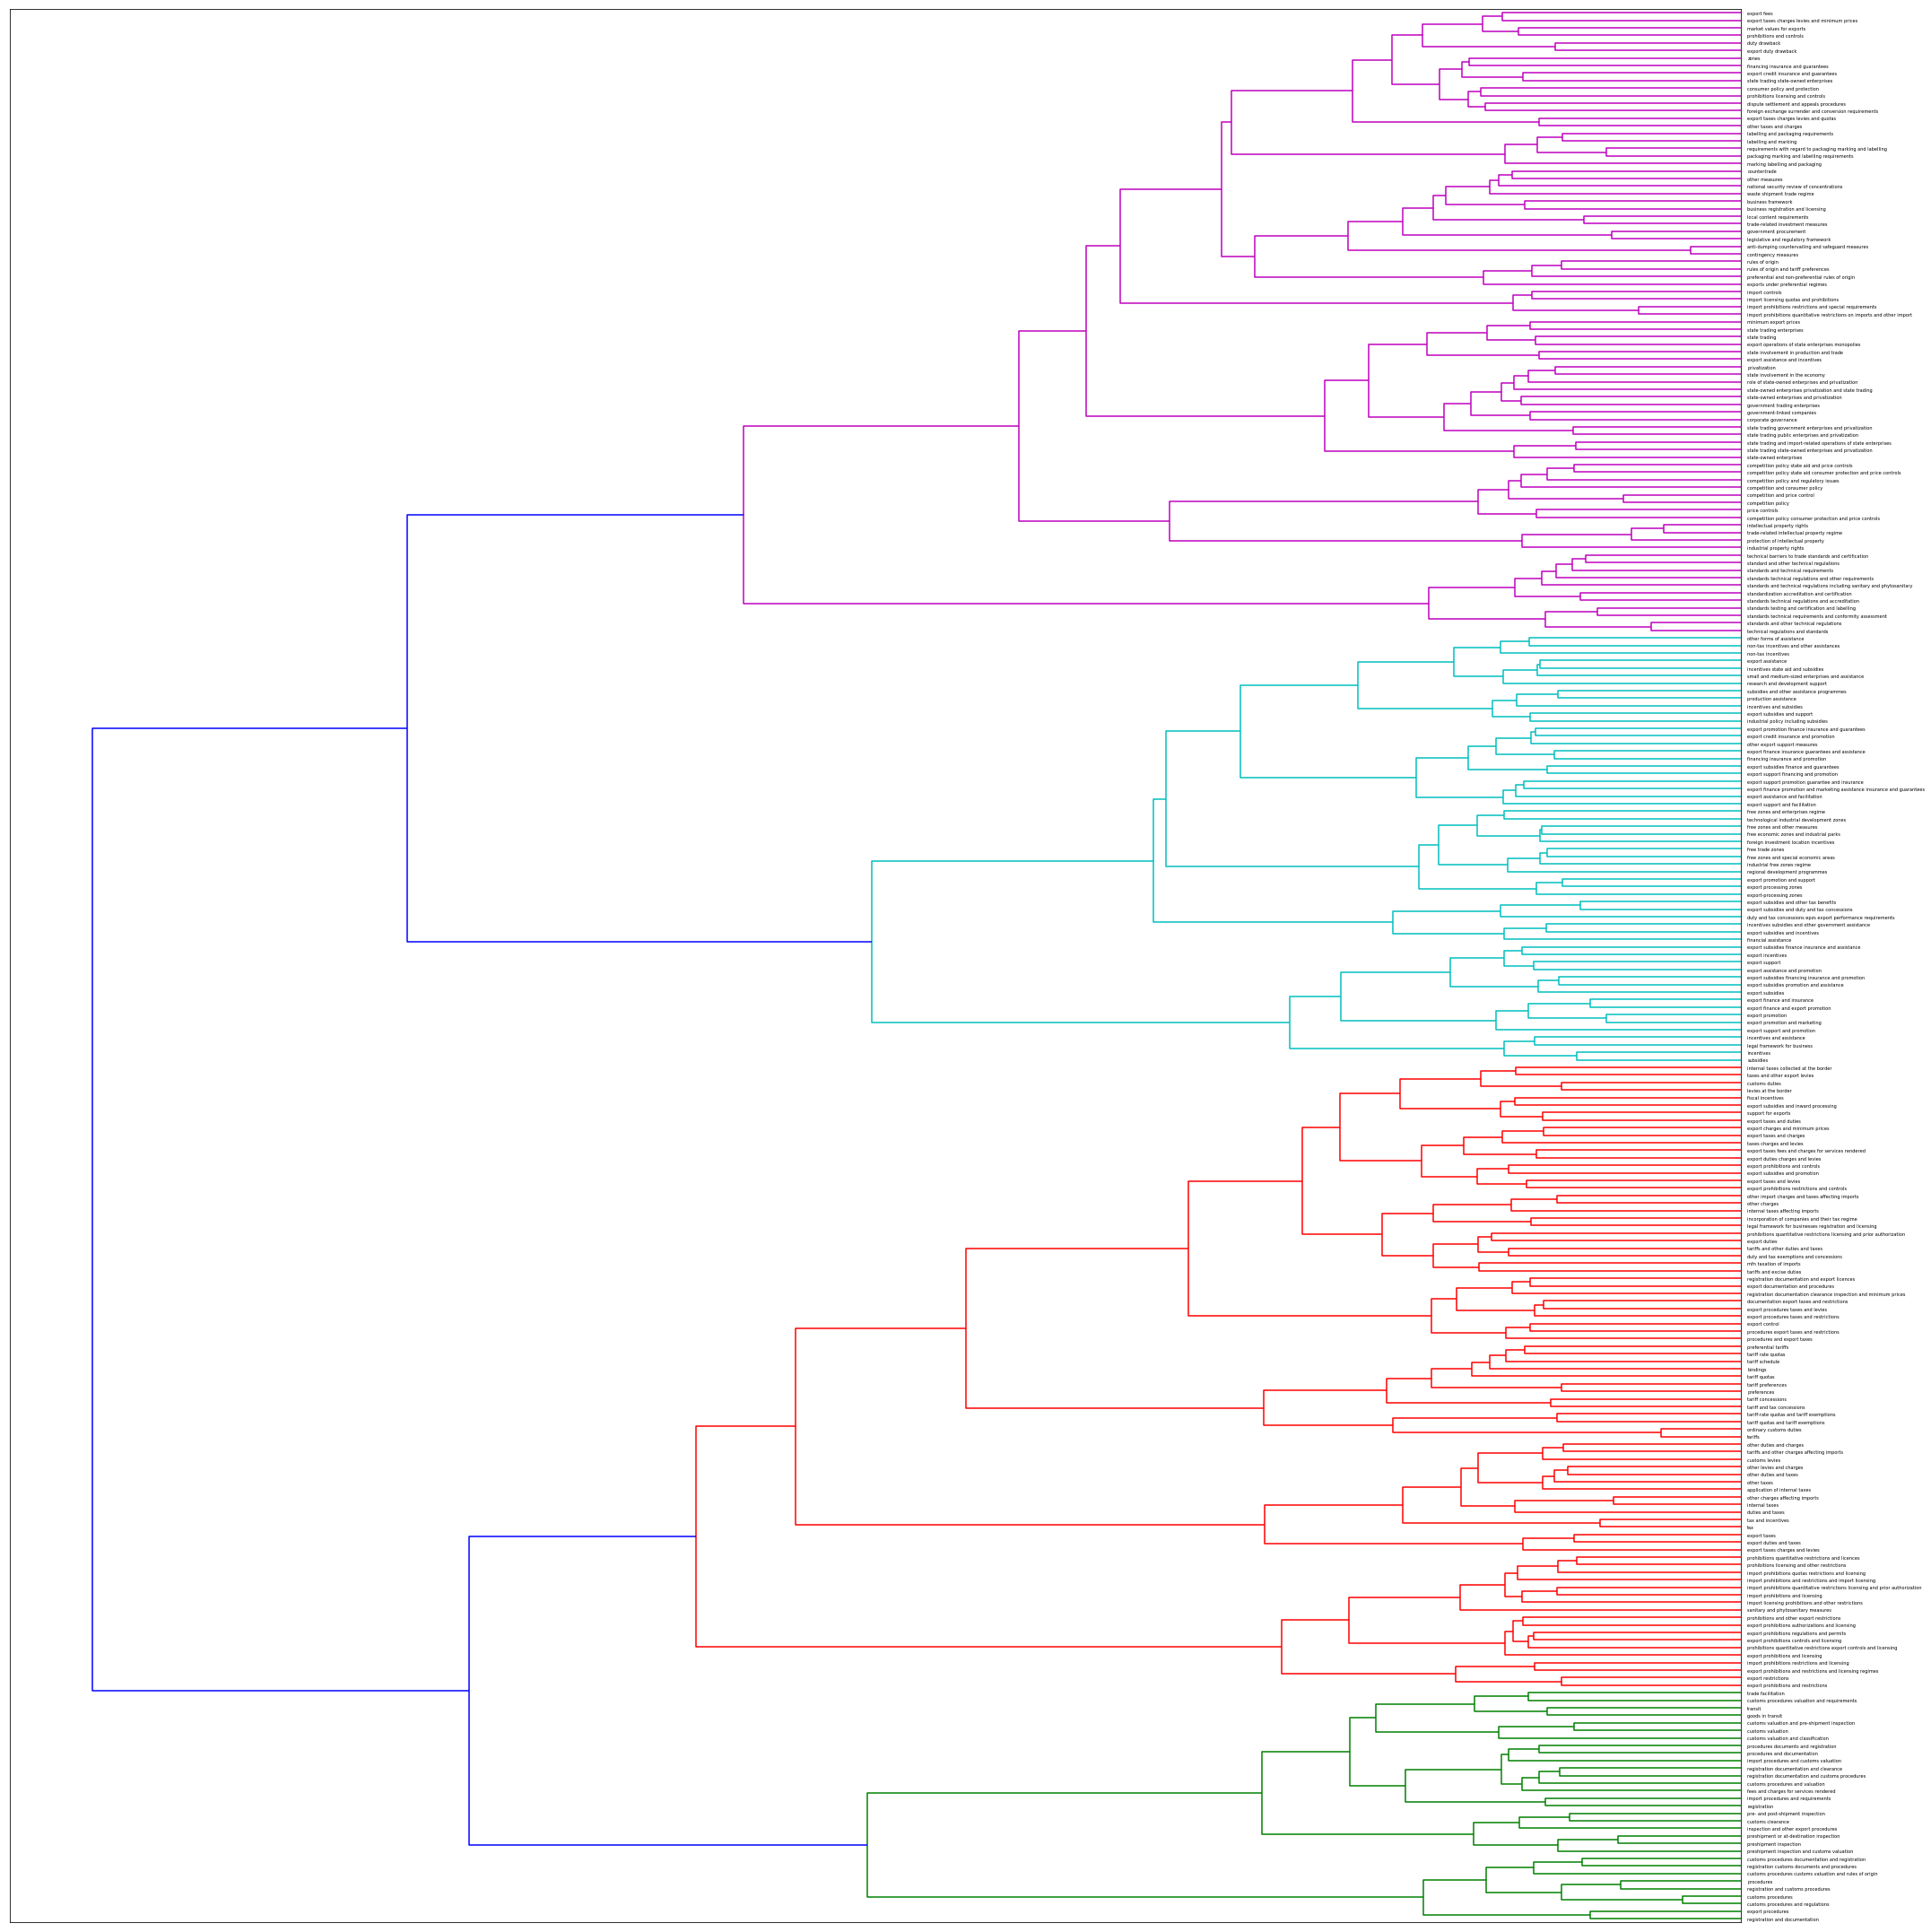

In [747]:
from scipy.cluster.hierarchy import ward, dendrogram

link = ward(dist)

fig, ax = plt.subplots(figsize=(30, 30)) 
ax = dendrogram(link, orientation='left', labels=section_names);

plt.tick_params(bottom='off', top='off', labelbottom='off')

plt.tight_layout() 

plt.savefig('ward_clusters.png', dpi=300) 